In [1]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from ucimlrepo import fetch_ucirepo

#Датасет "Post-Operative Patient"#

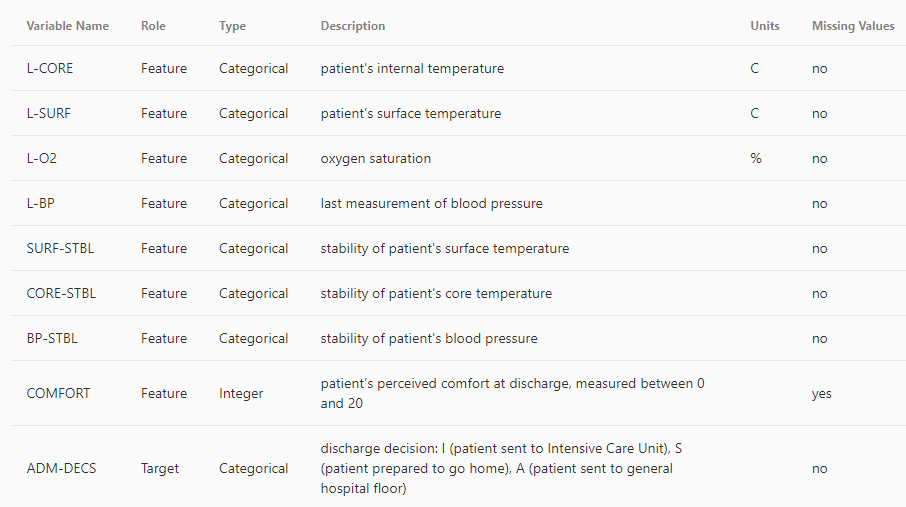

Таргет ADM-DESC
решение о выписке: I (пациент отправлен в отделение интенсивной терапии), S (пациент готов отправиться домой), A (пациент отправлен в больницу общего профиля)

In [ ]:
data = fetch_ucirepo(id=82)
print(data.metadata)

{'uci_id': 82, 'name': 'Post-Operative Patient', 'repository_url': 'https://archive.ics.uci.edu/dataset/82/post+operative+patient', 'data_url': 'https://archive.ics.uci.edu/static/public/82/data.csv', 'abstract': 'Dataset of patient features', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 90, 'num_features': 8, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['ADM-DECS'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1991, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5DG6Q', 'creators': ['Sharon Summers', 'Linda Woolery'], 'intro_paper': None, 'additional_info': {'summary': 'The classification task of this database is to determine where patients in a postoperative recovery area should be sent to next.  Because hypothermia is a significant concern after surgery (Woolery, L. et. al. 1991), the attributes correspon

In [ ]:
df = data['data']['features']
df['target'] = data.data.targets

In [ ]:
df.head(50)

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,target
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
5,high,low,good,mid,stable,stable,unstable,15.0,S
6,mid,low,excellent,high,stable,stable,mod-stable,5.0,S
7,high,mid,excellent,mid,unstable,unstable,stable,10.0,S
8,mid,high,good,mid,stable,stable,stable,10.0,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10.0,S


##Статическая информация о наборе данных##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L-CORE     90 non-null     object 
 1   L-SURF     90 non-null     object 
 2   L-O2       90 non-null     object 
 3   L-BP       90 non-null     object 
 4   SURF-STBL  90 non-null     object 
 5   CORE-STBL  90 non-null     object 
 6   BP-STBL    90 non-null     object 
 7   COMFORT    87 non-null     float64
 8   target     90 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.5+ KB


In [ ]:
print(df['target'].unique())
df['target'] = df['target'].str.replace('A ', 'A')
print(df['target'].unique())


['A' 'S' 'A ' 'I']
['A' 'S' 'I']


Оказалось что в столбце target помимо перечисленных в описании значений 'A', 'S' и 'I' имеются также и 'A ', заменяем их на 'A'

In [ ]:
df.describe()

,COMFORT
count,87.000000
mean,10.942529
std,2.304477
min,5.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,15.000000


##Названия признаков##

In [ ]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'target'],
      dtype='object')

##Замена категориальных данных количественными##

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = pd.factorize(df[column])[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L-CORE     90 non-null     int64  
 1   L-SURF     90 non-null     int64  
 2   L-O2       90 non-null     int64  
 3   L-BP       90 non-null     int64  
 4   SURF-STBL  90 non-null     int64  
 5   CORE-STBL  90 non-null     int64  
 6   BP-STBL    90 non-null     int64  
 7   COMFORT    87 non-null     float64
 8   target     90 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 6.5 KB


In [ ]:
for column in df.columns:
  if df[column].isnull().any():
    df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L-CORE     90 non-null     int64  
 1   L-SURF     90 non-null     int64  
 2   L-O2       90 non-null     int64  
 3   L-BP       90 non-null     int64  
 4   SURF-STBL  90 non-null     int64  
 5   CORE-STBL  90 non-null     int64  
 6   BP-STBL    90 non-null     int64  
 7   COMFORT    90 non-null     float64
 8   target     90 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 6.5 KB


In [ ]:
df.head(50)

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,target
0,0,0,0,0,0,0,0,15.0,0
1,0,1,0,1,0,0,0,10.0,1
2,1,0,0,1,0,0,1,10.0,0
3,0,0,1,1,0,1,1,15.0,0
4,0,2,0,1,0,0,0,10.0,0
5,1,0,1,0,0,0,2,15.0,1
6,0,0,0,1,0,0,1,5.0,1
7,1,2,0,0,1,1,0,10.0,1
8,0,1,1,0,0,0,0,10.0,1
9,0,0,0,0,1,0,1,10.0,1


##Визуализация данных##

###Визуализация для каждого признака###

In [ ]:
def visualize(featureName):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  df[featureName].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])

  sns.countplot(x=df[featureName], ax=axes[1])

  plt.tight_layout()

  plt.show()

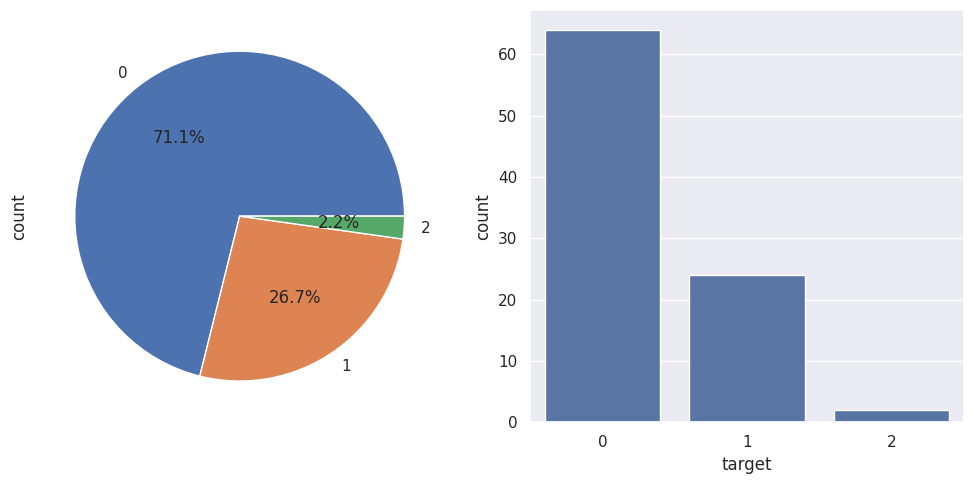

In [ ]:
visualize('target')

Целевой признак:  
0 - A (пациент отправлен на общий этаж больницы)  
1 - S (пациент готовится к отправке домой)  
2 - I (пациент отправлен в отделение интенсивной терапии)  

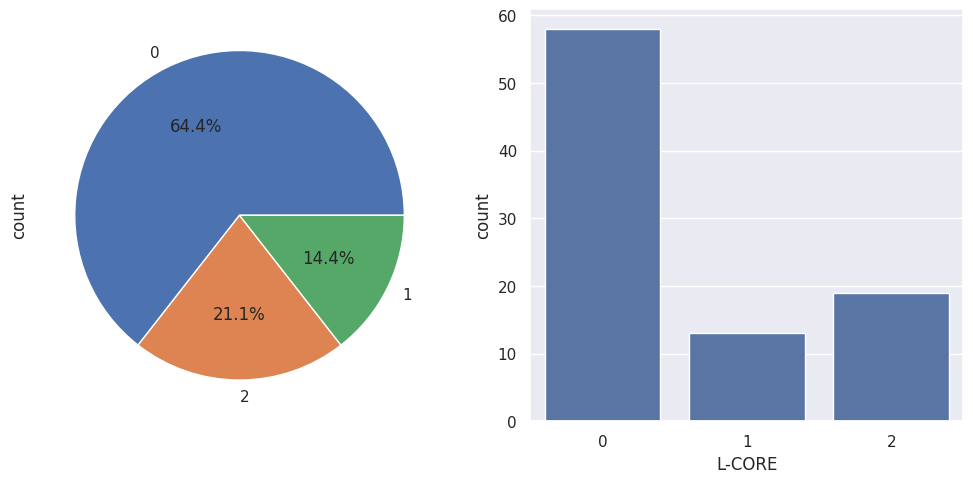

In [ ]:
visualize('L-CORE')

Внутренняя температура пациента (0 - средняя, 1 - высокая, 2 - низкая)

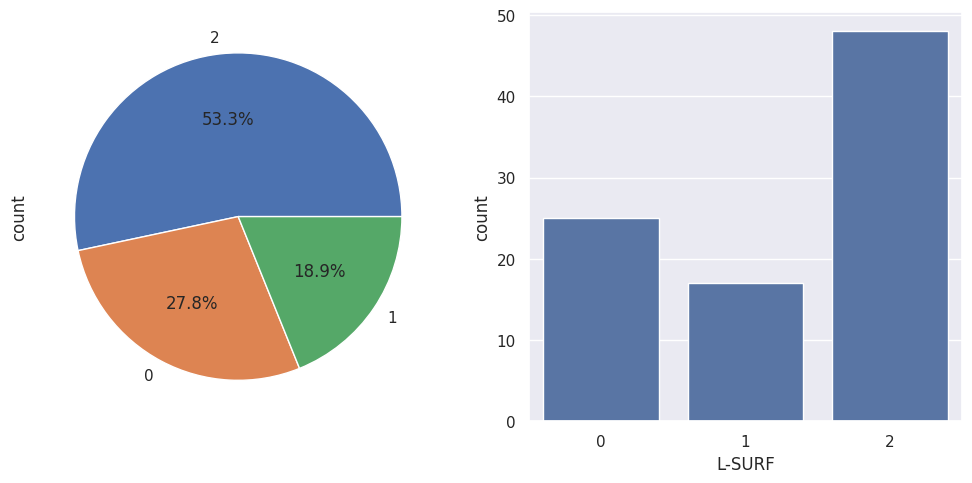

In [ ]:
visualize('L-SURF')

Поверхностная температура пациента (0 - низкая, 1 - высокая, 2 - средняя)

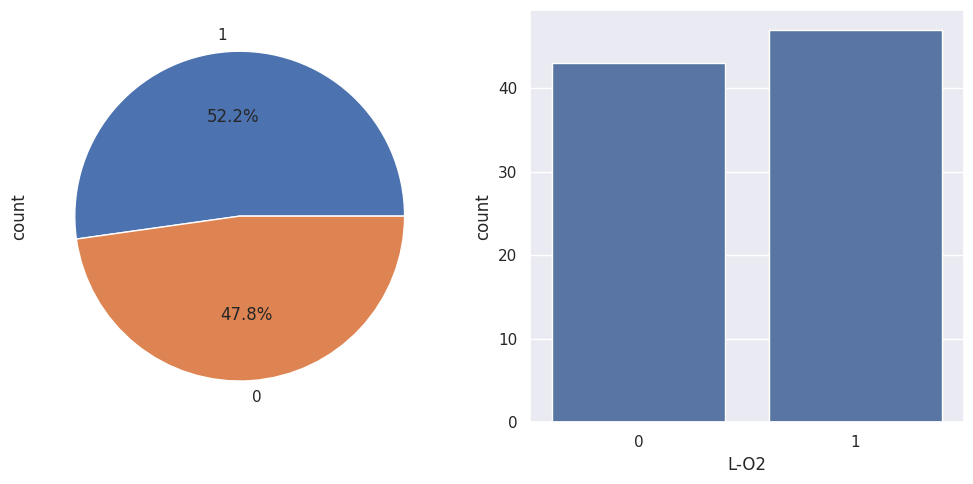

In [ ]:
visualize('L-O2')

Насыщение кислородом (0 - прекрасное, 1 - хорошее)

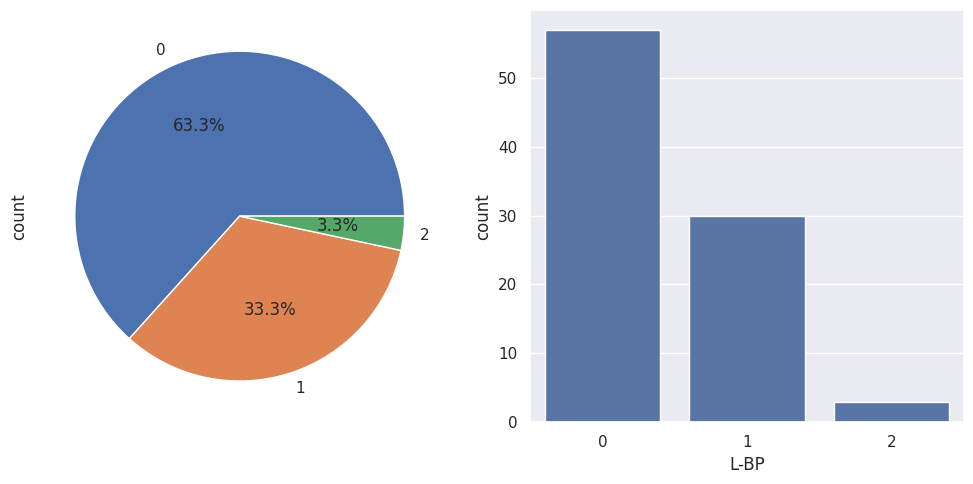

In [ ]:
visualize('L-BP')

Последнее измерение артериального давления (0 - среднее, 1 - высокое, 2 - низкое)

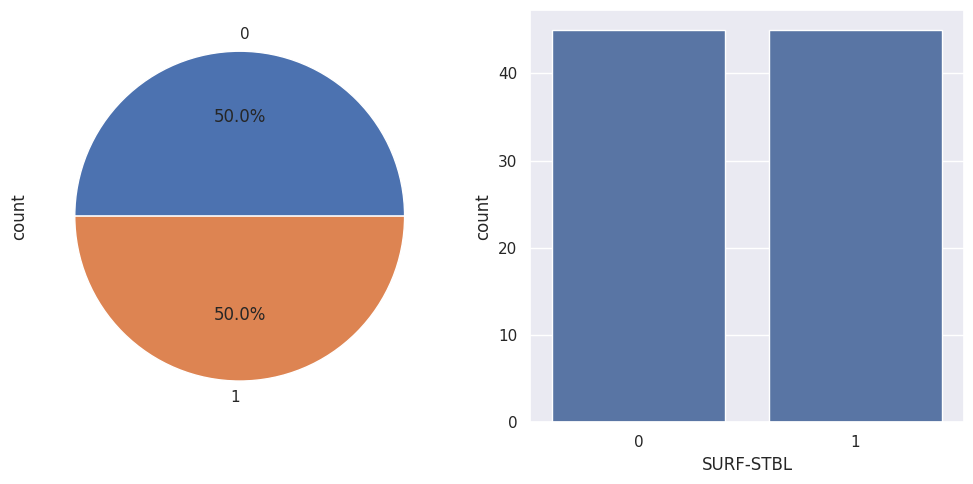

In [ ]:
visualize('SURF-STBL')

Стабильность температуры поверхности тела пациента (0 - стабильное, 2 - нестабильное)

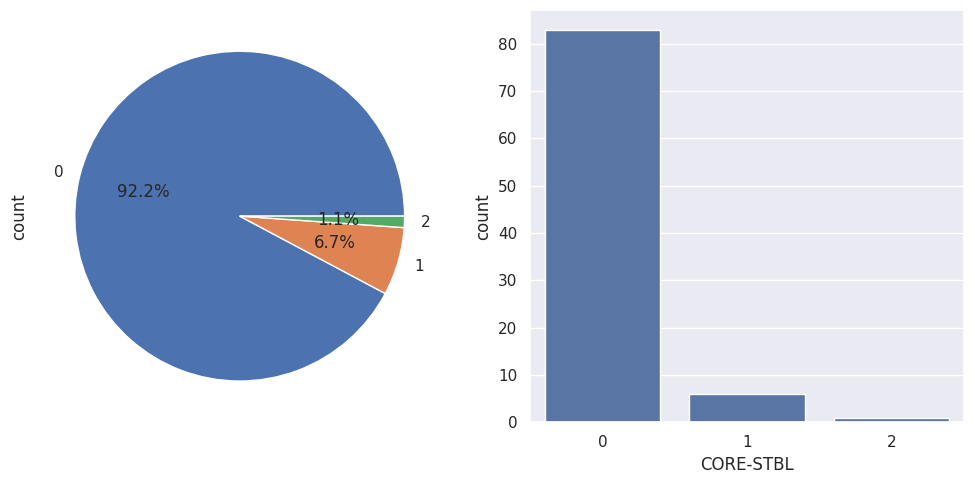

In [ ]:
visualize('CORE-STBL')

Стабильность внутренней температуры пациента (0 - стабильное, 1 - нестабильное, 2 - полустабильное)

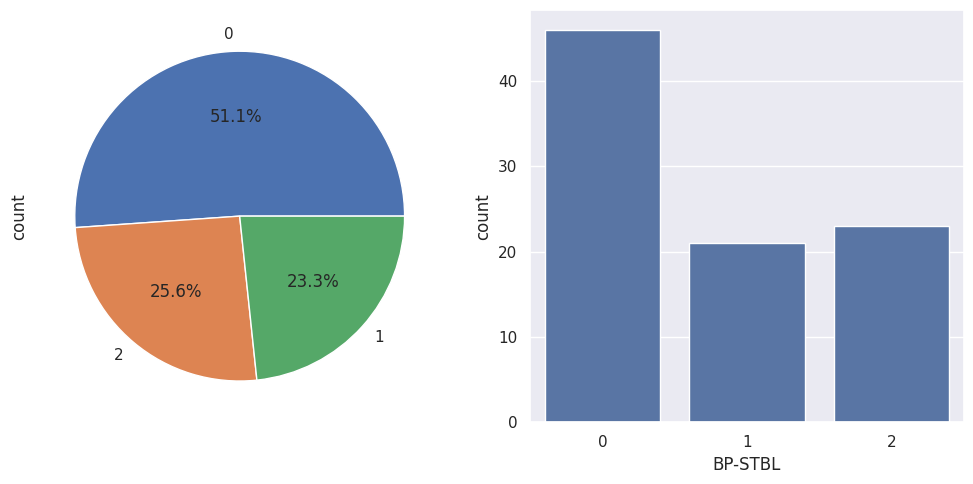

In [ ]:
visualize('BP-STBL')

Стабильность артериального давления пациента (0 - стабильное, 1 - полустабильное, 2 - нестабильное)

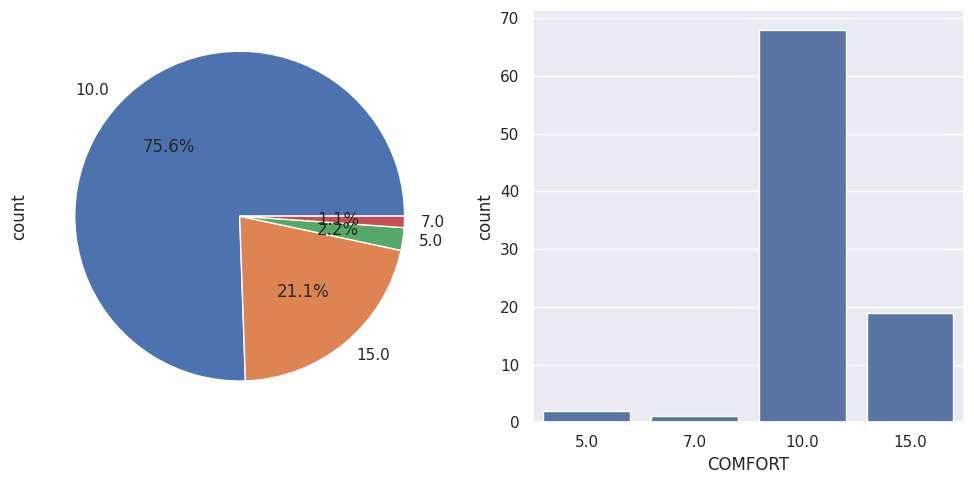

In [ ]:
visualize('COMFORT')

Воспринимаемый пациентом комфорт при выписке, измеряемый как целое число от 0 до 20

###Групповые визуализации###

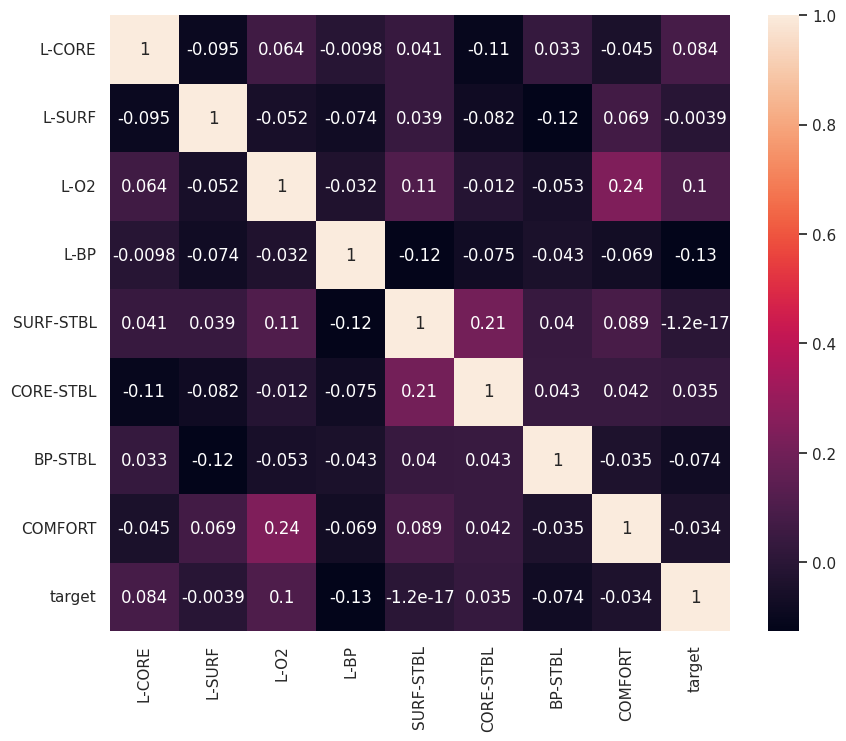

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

Из данного графика можно сделать вывод о том, что самымми влиятельными признаками оказались: L-O2, L-CORE.  
Так же видна сильная зависимость между признаками L-02 и COMFORT, CORE-STBL и SURF-STBL.

<Axes: xlabel='target', ylabel='count'>

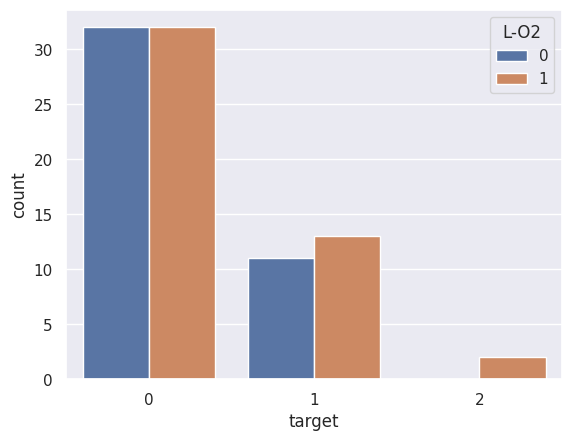

In [ ]:
sns.countplot(data=df, x="target", hue='L-O2')

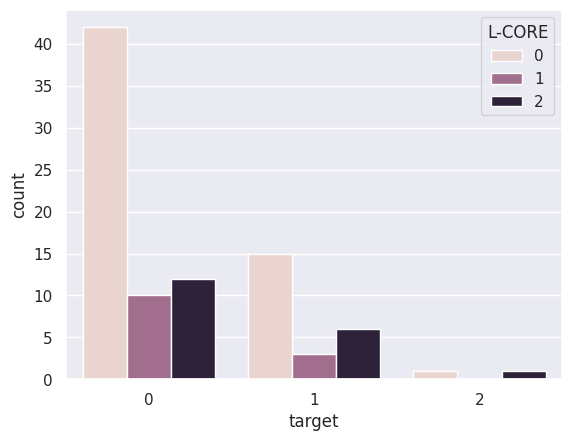

In [ ]:
sns.countplot(data=df, x="target", hue='L-CORE');

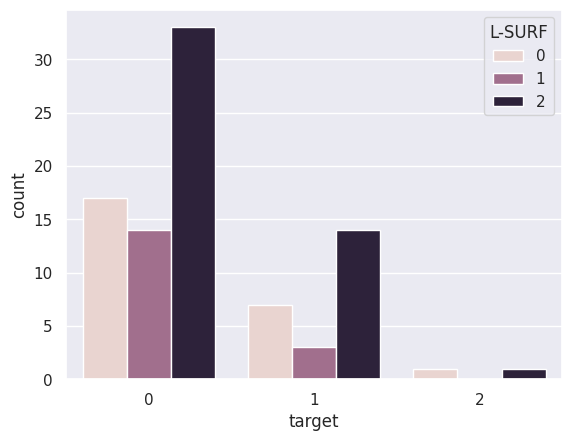

In [ ]:
sns.countplot(data=df, x="L-02", hue='COMFORT');